In [9]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
with open('output.txt', 'r') as csvfile:
    content = csv.reader(csvfile, delimiter='\t')
    lidar_data = []
    radar_data = []
    for i, row in enumerate(content):
        #row = [time_stamp, px, py, v, yaw_angle, yaw_rate, sensor, NIS, ....]
        if i == 1:
            time_start = int(row[0])
        if i > 0:
            if row[6]=='lidar':
                lidar_data.append([int(row[0])-time_start, row[7]])
            elif row[6] == 'radar':
                radar_data.append([int(row[0])-time_start, row[7]])

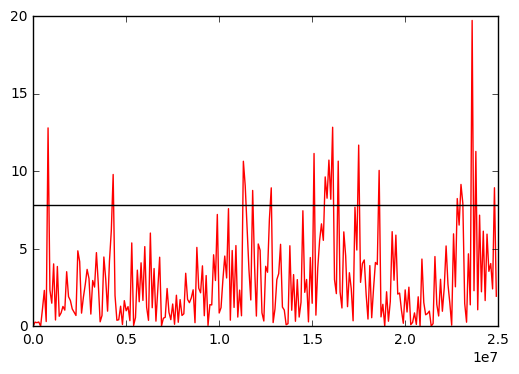

Cases above threshold in pct (target 5pct):  8.4


In [11]:
# Plot
lidar = np.array(lidar_data, dtype=float)
thresh_val = 7.8195
plt.plot(lidar[:,0], lidar[:,1], 'r-')
plt.plot([0,2.5*10**7], [thresh_val, thresh_val], 'k-')
plt.show()
#Statistics
a = lidar[(lidar[:,1] > thresh_val)]
n_cases = a.shape[0]/(lidar.shape[0]) * 100
print('Cases above threshold in pct (target 5pct): ', n_cases)
#cnt_above_thresh = ( lidar[lidar[:,1] > thresh_val][:,])